In [67]:
# this is based on https://projects.datacamp.com/projects/441
#load needed libraries and dataset
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv('/Users/ecuerbo/Desktop/data/nobel.csv')
df.head(6)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


In [68]:
display(len(df))
#count nobel prizes by sex
df.value_counts('Sex').head()

969

Sex
Male      893
Female     50
dtype: int64

In [69]:
#count nobel prizes by birth_country
df.value_counts('Birth Country').head(10)

Birth Country
United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
dtype: int64

In [70]:
#create a dataframe with 2 columns: decade and proportion of USA-born Nobel prize winner
df['usa_born'] = df['Birth Country'] == "United States of America"
df['decade'] = (np.floor(df['Year']/10)*10).astype(int)
usa_winners = df.groupby('decade', as_index=False)['usa_born'].mean()

#pproportion of US born winners per decade
print(usa_winners)

    decade  usa_born
0     1900  0.017241
1     1910  0.075000
2     1920  0.074074
3     1930  0.241935
4     1940  0.288889
5     1950  0.278481
6     1960  0.262500
7     1970  0.308411
8     1980  0.313131
9     1990  0.392523
10    2000  0.414286
11    2010  0.336735


## Visualizing US Dominance

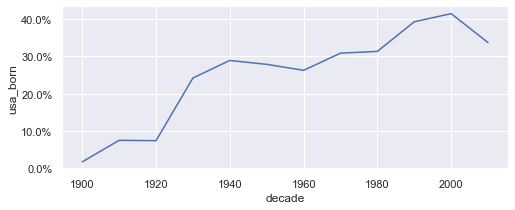

In [50]:
#setting the plotting theme
sns.set()

#setting the size of all plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,3]

#plotting US born winners
ax = sns.lineplot(x='decade', y='usa_born', data=usa_winners)

#adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter as pf
ax.yaxis.set_major_formatter(pf(1.0))

## Gender of typical Nobel Prize Winner

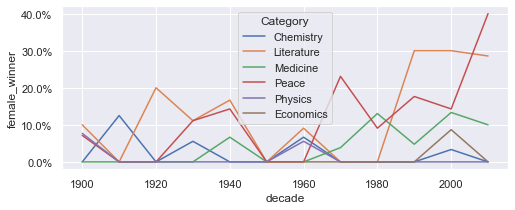

In [51]:
#calculating the proportion of female laureates per decade
df['female_winner'] = df['Sex'] == 'Female'
prop_female_winner = df.groupby(['decade', 'Category'], as_index=False)['female_winner'].mean()

#plotting female wiinners by category
ax = sns.lineplot(x='decade',y='female_winner', hue='Category', data=prop_female_winner)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter as pf
ax.yaxis.set_major_formatter(pf(1.0))

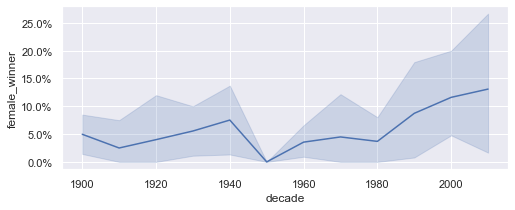

In [28]:
#plotting female wiinners
ax = sns.lineplot(x='decade',y='female_winner', data=prop_female_winner)
ax.yaxis.set_major_formatter(pf(1))

## First Woman to win the Nobel Prize

In [32]:
# Picking out the first woman to win a Nobel PrizE
(df[df['Sex']=='Female']).nsmallest(1,"Year")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## Repeat Winners

In [34]:
# Selecting the laureates that have received 2 or more prizes.
df.groupby('Full Name').filter(lambda x:len(x) >= 2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,906,Individual,Isamu Akasaki,1929-01-30,Chiran,...,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN,False,2010,False
945,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Francis Crick Institute,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
947,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,922,Individual,Paul Modrich,1946-06-13,"Raton, NM",...,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN,True,2010,False


## How old are you when you get the Nobel?

In [85]:
df1 = df.dropna(subset=['Birth Date'])

# Converting Birthdate from String to datetime
df1['Birth Date'] = pd.to_datetime(df1['Birth Date'], )

#calculating age of Nobel Prize winners
df1['Age'] = df1['Year'] - df1['Birth Date'].dt.year

# Plotting the age of Nobel Prize Winners
sns.lmplot(x= 'Year', y='Age', data=df1, lowess=True, aspect=2, line_kws={'color':'black'});

ParserError: month must be in 1..12: 1898-00-00

## Oldest and youngest winner

In [ ]:
# The oldest winner of a Nobel Prize as of 2016
nobel.nlargest(1,'age')

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1,'age')

In [73]:
#oldest as of 2016
df.nlargest(1,'Age')

KeyError: 'Age'

In [79]:
df1 = df.dropna(subset='Birth Date')

TypeError: Index(...) must be called with a collection of some kind, 'Birth Date' was passed

In [84]:
df1.isnull().sum()

Year                      0
Category                  0
Prize                     0
Motivation               72
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                0
Birth City                2
Birth Country             0
Sex                       0
Organization Name       221
Organization City       227
Organization Country    227
Death Date              323
Death City              341
Death Country           335
usa_born                  0
decade                    0
dtype: int64